In [1]:
# `pandas` for reading and assessing our data
import pandas as pd

# `seaborn` for its built-in themes and chart types
import seaborn as sns

# `matplotlib` for customizing visual details
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# # UNCOMMENT BELOW TO USE WITH GOOGLE COLAB
# # Import PyDrive and associated libraries.
# # This only needs to be done once per notebook.
# # Documentation found here: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once per notebook.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [3]:
# # UNCOMMENT BELOW TO USE WITH GOOGLE COLAB
# # Link to data file stored in Drive: https://drive.google.com/file/d/1z6XEYE8Qg2gxkwotc1htbx2Maxuveg7-/view?usp=sharing
# file_id = '1z6XEYE8Qg2gxkwotc1htbx2Maxuveg7-' # notice where this string comes from in link above

# imported_file = drive.CreateFile({'id': file_id}) # creating an accessible copy of the shared data file
# print(imported_file['title'])  # it should print the title of desired file
# imported_file.GetContentFile(imported_file['title']) # refer to it in this notebook by the same name as it has in Drive

In [4]:
# read in our data
ppp_data = pd.read_csv('../datasets/public_150k_plus_221.csv')

In [5]:
# set a basic color theme for our visualization
sns.set_theme(style="whitegrid")

In [6]:
# use the built-in `mean()` and `median()` methods in `pandas
mean = ppp_data['CurrentApprovalAmount'].mean()
median = ppp_data['CurrentApprovalAmount'].median()

In [7]:
# Q1 is the value at the position in our dataset
# that has 25% of data readings to its left
Q1 = ppp_data['CurrentApprovalAmount'].quantile(0.25)

# Q3 is the value at the position in our dataset
# that has 75% of data readings to its left
Q3 = ppp_data['CurrentApprovalAmount'].quantile(0.75)

# IQR is the difference between the Q3 and Q1 values
IQR = Q3-Q1

# and now we calculate our lower and upper bounds
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

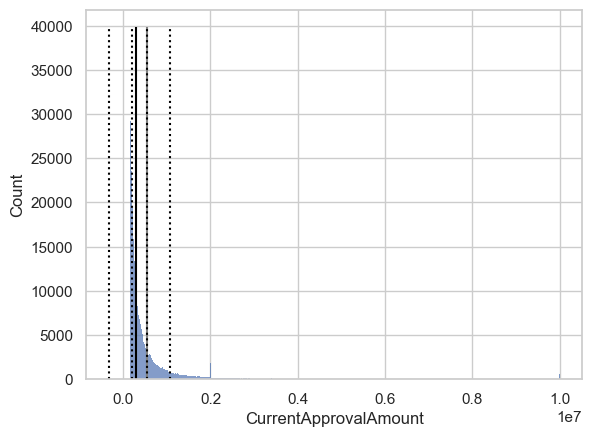

In [8]:
# use `seaborn` to plot the histogram
approved_loan_plot = sns.histplot(data=ppp_data, x="CurrentApprovalAmount")

# get the min and max y-values on our histogram
y_axis_range = approved_loan_plot.get_ylim()

# add mean line in gray
approved_loan_plot.vlines(mean, 0, y_axis_range[1], color='gray', ls='-')

# other lines in black (median solid, others dotted)
approved_loan_plot.vlines(median, 0, y_axis_range[1], color='black', ls='-')
approved_loan_plot.vlines(lower_bound, 0, y_axis_range[1], color='black', ls=':')
approved_loan_plot.vlines(Q1, 0, y_axis_range[1], color='black', ls=':')
approved_loan_plot.vlines(Q3, 0, y_axis_range[1], color='black', ls=':')
approved_loan_plot.vlines(upper_bound, 0, y_axis_range[1], color='black', ls=':')

# show the plot!
plt.show()